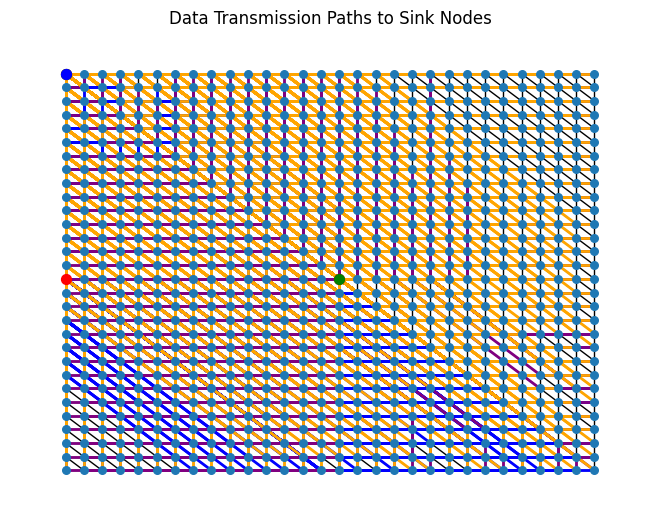

Estimated Lifetime in Rounds (3 Sinks): 3674.9093522359776
Estimated Lifetime in Rounds (2 Sinks): 5871.685661787252
Estimated Lifetime in Rounds (1 Sink): 9634.986047469647


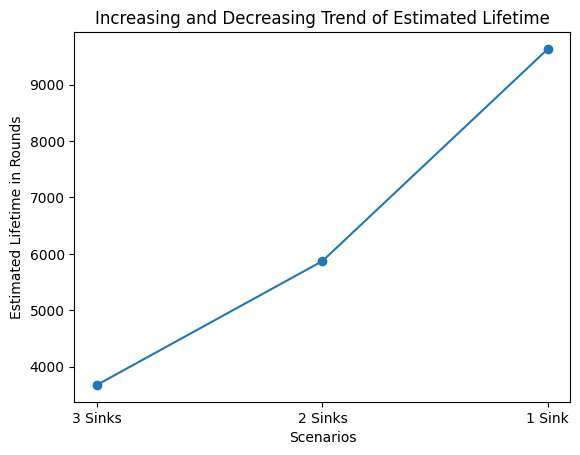

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def calculate_lifetime(G, sink_ids, source_selection_mode='round-robin'):
    total_hops = 0
    total_energy = len(G.nodes)  # Initial energy of nodes is 1 J

    source_nodes = list(G.nodes())
    random.shuffle(source_nodes)

    # Visualize paths from source nodes to the nearest sink
    for source_node in source_nodes:
        if source_selection_mode == 'round-robin':
            source_sink_pairs = [(source_node, sink_id) for sink_id in sink_ids]
        else:
            # Default to round-robin if an invalid mode is provided
            source_sink_pairs = [(source_node, sink_id) for sink_id in sink_ids]

        for (source_node, sink_id) in source_sink_pairs:
            # Calculate the shortest path from the source node to the sink
            shortest_path = nx.shortest_path(G, source=source_node, target=sink_id)
            total_hops += len(shortest_path) - 1

    # Estimate the lifetime in rounds
    packet_size = 4000  # bits
    path_loss_exponent = 3
    node_density = 0.0011
    transmission_energy = packet_size * total_hops * (node_density ** path_loss_exponent)

    # Calculate the number of rounds until energy depletion
    num_rounds = total_energy / transmission_energy

    return num_rounds, total_hops

# Parameters
grid_size = 30
sink_coordinates = [(0, 0), (15, 15), (0, 15)]  # Coordinates of three sink nodes
sink_ids = sink_coordinates
source_selection_mode = 'round-robin'  # Source selection mode

# Create a grid-based graph with diagonal connections
G = nx.grid_2d_graph(grid_size, grid_size)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Calculate lifetime for 3 sinks
num_rounds_3_sinks, total_hops_3_sinks = calculate_lifetime(G, sink_ids, source_selection_mode)

# Calculate lifetime for 2 sinks
num_rounds_2_sinks, total_hops_2_sinks = calculate_lifetime(G, sink_ids[:-1], source_selection_mode)

# Calculate lifetime for 1 sink
num_rounds_1_sink, total_hops_1_sink = calculate_lifetime(G, [sink_ids[0]], source_selection_mode)

# Visualize the Sensor Network with the Sink Nodes and Data Transmission Paths
plt.figure()
pos = {(x, y): (x, -y) for x, y in G.nodes()}
nx.draw(G, pos, node_size=30)

# Plot for 3 sinks
for nearest_sink in sink_ids:
    nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='red', node_size=50)
for source_node in G.nodes:
    shortest_path = nx.shortest_path(G, source=source_node, target=nearest_sink)
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)

# Plot for 2 sinks
for nearest_sink in sink_ids[:-1]:
    nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='green', node_size=50)
for source_node in G.nodes:
    shortest_path = nx.shortest_path(G, source=source_node, target=nearest_sink)
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='purple', width=2)

# Plot for 1 sink
for nearest_sink in [sink_ids[0]]:
    nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='blue', node_size=50)
for source_node in G.nodes:
    shortest_path = nx.shortest_path(G, source=source_node, target=nearest_sink)
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=2)

plt.title(f'Data Transmission Paths to Sink Nodes')
plt.show()

# Display calculated lifetime for each scenario
print("Estimated Lifetime in Rounds (3 Sinks):", num_rounds_3_sinks)
print("Estimated Lifetime in Rounds (2 Sinks):", num_rounds_2_sinks)
print("Estimated Lifetime in Rounds (1 Sink):", num_rounds_1_sink)

# Visualize the increasing and decreasing trend of estimated lifetime
plt.figure()
scenarios = ['3 Sinks', '2 Sinks', '1 Sink']
lifetime_data = [num_rounds_3_sinks, num_rounds_2_sinks, num_rounds_1_sink]
plt.plot(scenarios, lifetime_data, marker='o', linestyle='-')
plt.xlabel('Scenarios')
plt.ylabel('Estimated Lifetime in Rounds')
plt.title('Increasing and Decreasing Trend of Estimated Lifetime')
plt.show()
